In [1]:
import numpy as np
import pandas as pd

Data Collection <br>
Exploratory Data Analysis<br>
Preprocessing<br>
Model Building<br>
Evaluation<br>
Deployment

# Data Preprocessing

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.shape

(418, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
df.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

Data Cleaning Procedure<br>
1.Check the presence of missing value<br>
2.Calculate precentage of missing data<br>
3.  a.If % of missing is more than 30%, then drop the column.<br>
    b.If % of missing is more than 1% and less than 30%, impute.<br>
    c.If % of missing is less than 1%, drop the row.<br>

In [8]:
df.isnull().sum() / df.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [9]:
df.drop("Cabin",axis=1,inplace=True)

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


<b>Imputation</b><br>
Numerical data<br>
Outlier-Median<br>
no outlier-mean<br>

In [11]:
import seaborn as sns

<AxesSubplot:xlabel='Age'>

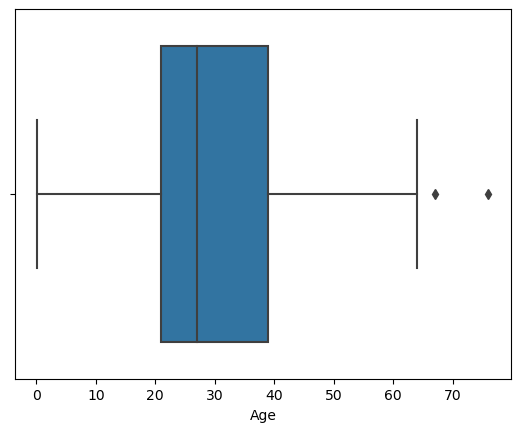

In [12]:
sns.boxplot(x = df.Age)

In [13]:
#imputing median values for the missing data in Age column
df.Age = df.Age.fillna(df.Age.median)

In [14]:
df.Age.isnull().sum()

0

In [15]:
#Fare column, we drop the row
df.Fare = df.Fare.dropna(axis=0,how="all")

In [16]:
df.Fare.isnull().sum()

1

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [18]:
df.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,<bound method NDFrame._add_numeric_operations....,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,<bound method NDFrame._add_numeric_operations....,0,0,359309,8.0500,S


# Encoding Techniques
### Label Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le = LabelEncoder()

In [21]:
a = ["A","B","C","D","D","F"]

In [22]:
le.fit(a)

LabelEncoder()

In [23]:
le.transform(["A"])

array([0])

In [24]:
le.fit_transform(a)

array([0, 1, 2, 3, 3, 4], dtype=int64)

In [25]:
data = pd.read_csv("insurance.csv")

In [26]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [28]:
data.nunique()

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

In [29]:
data.select_dtypes('object')

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [30]:
data.sex = le.fit_transform(data.sex)

In [31]:
data.smoker = le.fit_transform(data.smoker)

In [32]:
data.region = le.fit_transform(data.region)

### One Hot Encoding

In [33]:
#For region column, one hot encoding - get_dummies, OneHotEncoder
pd.get_dummies(data, columns = ["sex","smoker","region"])

,age,bmi,children,expenses,sex_0,sex_1,smoker_0,smoker_1,region_0,region_1,region_2,region_3
0,19,27.9,0,16884.92,1,0,0,1,0,0,0,1
1,18,33.8,1,1725.55,0,1,1,0,0,0,1,0
2,28,33.0,3,4449.46,0,1,1,0,0,0,1,0
3,33,22.7,0,21984.47,0,1,1,0,0,1,0,0
4,32,28.9,0,3866.86,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,0,1,1,0,0,1,0,0
1334,18,31.9,0,2205.98,1,0,1,0,1,0,0,0
1335,18,36.9,0,1629.83,1,0,1,0,0,0,1,0
1336,21,25.8,0,2007.95,1,0,1,0,0,0,0,1


In [34]:
from sklearn.preprocessing import OneHotEncoder
a = [["apple","mango","mango","orange"]]
ohe = OneHotEncoder()
ohe.fit(a)

OneHotEncoder()

### Binary encoding
It converts a category into binary digits. Each binary digits creates one feature column.

In [35]:
!pip install category_encoders
import category_encoders as ce

In [36]:
import category_encoders as ce

For output column, using label encoding is the only option.

In [37]:
data_p = pd.read_csv("placement.csv")

In [38]:
data_p.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [39]:
data_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


C:\Users\K JAYARAMAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cgpa'>

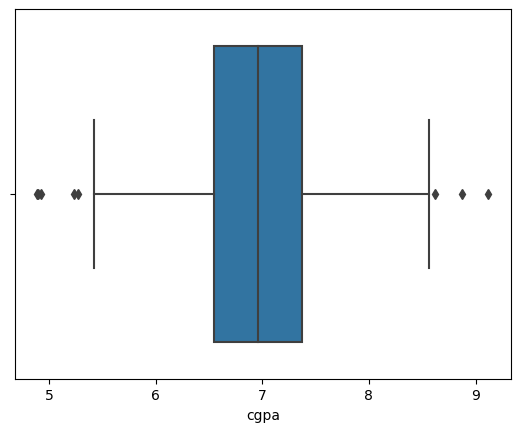

In [40]:
sns.boxplot(data_p.cgpa)

C:\Users\K JAYARAMAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='placement_exam_marks'>

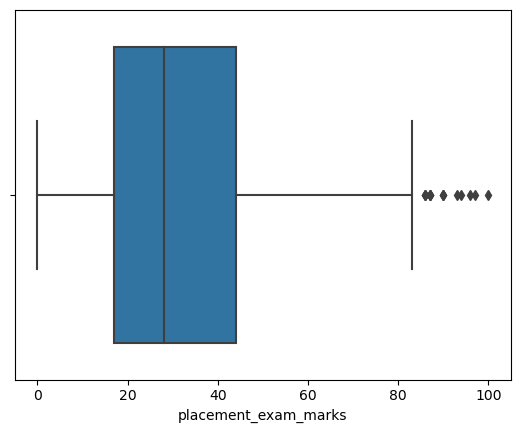

In [41]:
sns.boxplot(data_p.placement_exam_marks)

C:\Users\K JAYARAMAN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cgpa', ylabel='Density'>

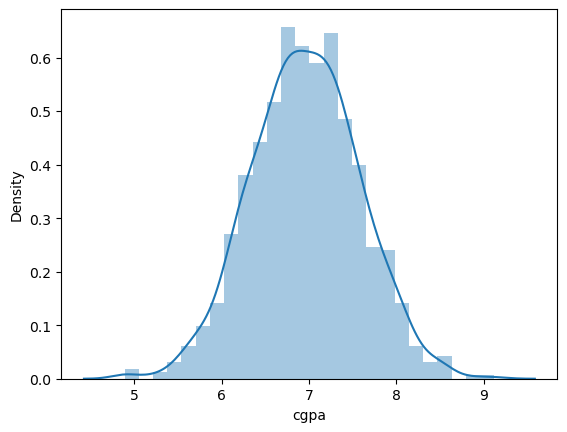

In [42]:
sns.distplot(data_p.cgpa)

C:\Users\K JAYARAMAN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='placement_exam_marks', ylabel='Density'>

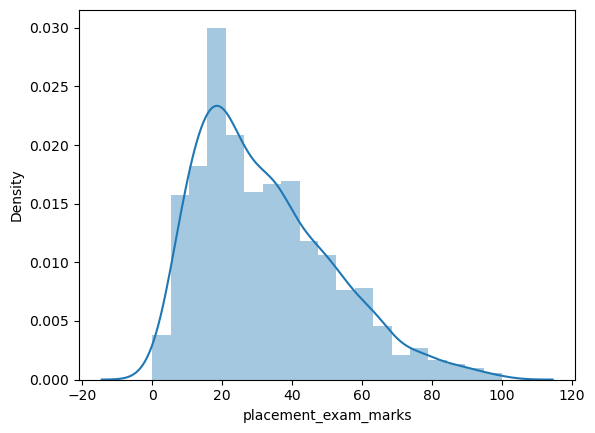

In [43]:
sns.distplot(data_p.placement_exam_marks)

In [44]:
#z = x-mean/std
#MAX, 3 = Xmax - mean/std => Xmax = 3*std+mean
#min, -3 = Xmin - mean/std => Xmin = mean - 3*std

MAX = 3 * data_p.cgpa.std() + data_p.cgpa.mean()
MIN = data_p.cgpa.mean() - 3 * data_p.cgpa.std()
print(MAX,MIN)

8.808933625397177 5.113546374602842


trimming and capping: outliers handling

In [45]:
new_data = data_p.copy()

In [46]:
new_data.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [47]:
new_data[new_data.cgpa>MAX]

,cgpa,placement_exam_marks,placed
995,8.87,44.0,1
996,9.12,65.0,1


In [48]:
new_data[new_data.cgpa<MIN]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [52]:
new_data_1 = new_data[new_data.cgpa<=MAX] #Trimming
new_data_1

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
993,6.73,21.0,1
994,6.48,63.0,0
997,4.89,34.0,0
998,8.62,46.0,1


In [58]:
new_data_2 = new_data[new_data.cgpa>=MIN]
new_data_2

,cgpa,placement_exam_marks,placed
0,7.190000,26.0,1
1,7.460000,38.0,1
2,7.540000,40.0,1
3,6.420000,8.0,1
4,7.230000,17.0,0
...,...,...,...
993,6.730000,21.0,1
994,6.480000,63.0,0
997,5.113546,34.0,0
998,8.620000,46.0,1


In [54]:
def convert(x):
    if x>MAX:
        return MAX
    elif x<MIN:
        return MIN
    else:
        return x

In [55]:
new_data.cgpa = new_data.cgpa.map(convert)

In [59]:
new_data.shape

(998, 3)

In [60]:
Q1 = data_p.placement_exam_marks.quantile(0.25)
Q3 = data_p.placement_exam_marks.quantile(0.75)
max = Q3 + 1.5*(Q3-Q1)
min = Q1 - 1.5*(Q3-Q1)
max,min

(84.5, -23.5)

# Project 1

In [61]:
df = pd.read_csv("Salary.csv")

In [62]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [64]:
df.isnull().sum()/df.shape[0]*100

YearsExperience    0.0
Salary             0.0
dtype: float64

C:\Users\K JAYARAMAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary'>

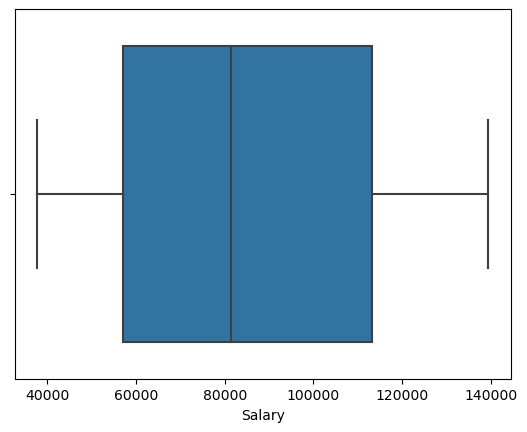

In [65]:
sns.boxplot(df.Salary)

C:\Users\K JAYARAMAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsExperience'>

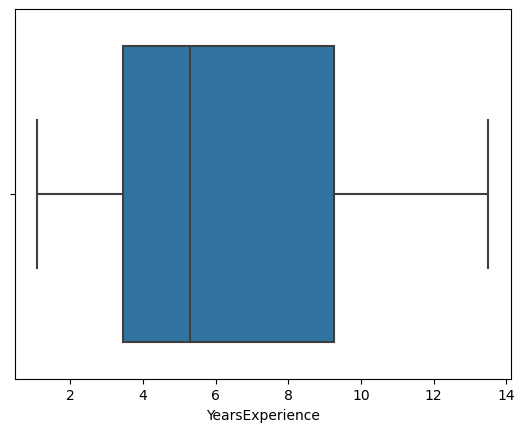

In [67]:
sns.boxplot(df.YearsExperience)

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

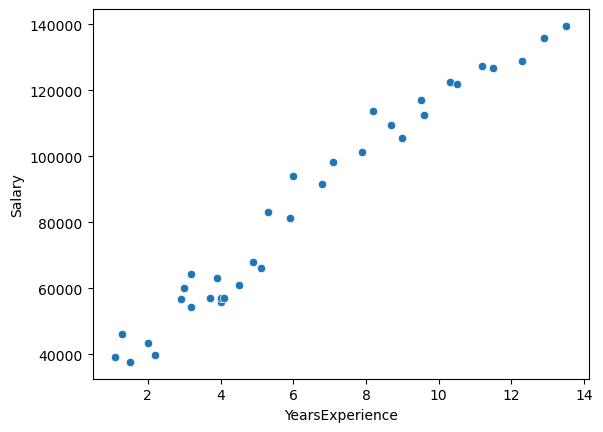

In [74]:
sns.scatterplot(data = df,
               x="YearsExperience",
               y="Salary")

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
lr = LinearRegression()

In [75]:
X = df.iloc[:,:-1]

In [76]:
y = df.iloc[:,-1]

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [96]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28, 1), (7, 1), (28,), (7,))

In [97]:
lr.fit(X_train,y_train)

LinearRegression()

In [98]:
lr.coef_

array([8578.76747669])

In [91]:
lr.predict(X_test)

array([ 65377.76384262,  68846.65384201, 112207.77883428,  61908.87384324,
       119145.55883305, 136490.00882996,  39361.08884726])

In [99]:
lr.score(X_test,y_test)*100

89.1423414004278

In [100]:
new= [[7]]
lr.predict(new)

C:\Users\K JAYARAMAN\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([89129.99837121])

In [101]:
new1 = [[17]]
lr.predict(new1)

C:\Users\K JAYARAMAN\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([174917.67313807])

In [102]:
## Ice creame sales prediction assignment 2

In [103]:
df_insurance = pd.read_csv("insurance.csv")

In [104]:
df_insurance.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [106]:
df_insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

C:\Users\K JAYARAMAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

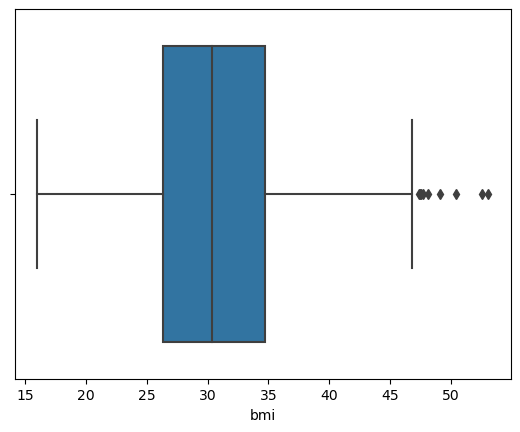

In [107]:
sns.boxplot(df_insurance.bmi)

In [108]:
df_insurance.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [110]:
df_insurance = pd.get_dummies(df_insurance, columns = ["sex","smoker","region"])

In [111]:
df_insurance.head()

,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,1,0,0,1,0,0,0,1
1,18,33.8,1,1725.55,0,1,1,0,0,0,1,0
2,28,33.0,3,4449.46,0,1,1,0,0,0,1,0
3,33,22.7,0,21984.47,0,1,1,0,0,1,0,0
4,32,28.9,0,3866.86,0,1,1,0,0,1,0,0
